In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from glob import glob


#import warnings
#warnings.filterwarnings('ignore')


In [2]:
def get_mutinc(path):
    
    data = np.load(path)

    l1 = data[1:,6:9]
    l2 = data[1:,13:16]

    t = data[1:,0]
    
    A1 = np.linalg.norm(l1,axis=1)
    A2 = np.linalg.norm(l2,axis=1)
    
    cosinc = np.diag(np.matmul(l1,l2.T))/A1/A2
    inc= np.arccos(np.clip(cosinc,-1,1))

    if np.sum(t==0)>0:
        it = t>0
        t = t[it]
        cosinc = cosinc[it]
        inc = inc[it]
        tt = np.linspace(0.,1.,10001)[1:]*1e5
        cosinc = np.interp(tt,t,cosinc)
        inc = np.interp(tt,t,inc)
        t = tt
        
    return t, cosinc, inc

<ipython-input-2-24af396d1c1f>:13: RuntimeWarning: invalid value encountered in true_divide
  cosinc = np.diag(np.matmul(l1,l2.T))/A1/A2
<ipython-input-2-24af396d1c1f>:13: RuntimeWarning: invalid value encountered in true_divide
  cosinc = np.diag(np.matmul(l1,l2.T))/A1/A2
<ipython-input-2-24af396d1c1f>:13: RuntimeWarning: invalid value encountered in true_divide
  cosinc = np.diag(np.matmul(l1,l2.T))/A1/A2
<ipython-input-2-24af396d1c1f>:13: RuntimeWarning: invalid value encountered in true_divide
  cosinc = np.diag(np.matmul(l1,l2.T))/A1/A2
<ipython-input-2-24af396d1c1f>:13: RuntimeWarning: invalid value encountered in true_divide
  cosinc = np.diag(np.matmul(l1,l2.T))/A1/A2
<ipython-input-2-24af396d1c1f>:13: RuntimeWarning: invalid value encountered in true_divide
  cosinc = np.diag(np.matmul(l1,l2.T))/A1/A2
<ipython-input-2-24af396d1c1f>:13: RuntimeWarning: invalid value encountered in true_divide
  cosinc = np.diag(np.matmul(l1,l2.T))/A1/A2
<ipython-input-2-24af396d1c1f>:13: Runtim

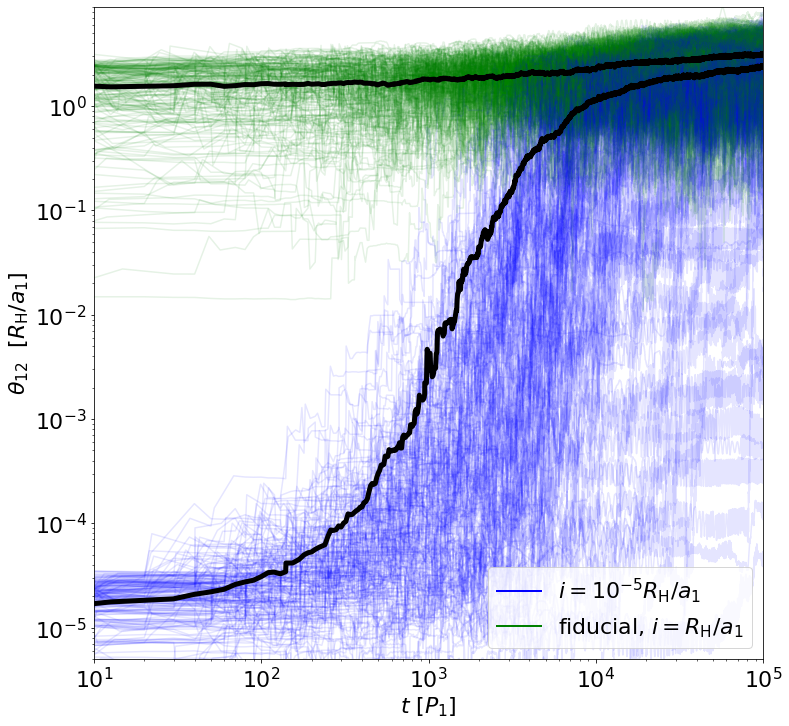

In [6]:
RH1 = (1e-5/3.)**(1./3.)


plt.rcParams.update({'font.size':22})

fig,axs = plt.subplots(1,1, sharey=True, figsize=(12,12))
fig.subplots_adjust(wspace=0.0)

plt.rcParams.update({'font.size':22})


axs.set_xlabel(r'$t$ [$P_1$]')
axs.set_ylabel(r'$\theta_{12}$  $[R_{\rm H}/a_1]$')

axs.set_xlim([1e1,1e5])
axs.set_ylim([5e-6,9e0])

axs.set_xscale('log')
axs.set_yscale('log')


sum_i1 = np.zeros(10000)
sum_i2 = np.zeros(10000)

Nrun = 200

for i in range(Nrun):
    run_name = 'd:/_work/BBH-data_use/can-5-snap/Energy%05d.npy'%(i)
    tE, cosinc, inc = get_mutinc(run_name)
    sum_i1 = sum_i1 + inc
    axs.plot(tE,inc/RH1,color='b',alpha=0.1)

    run_name = 'd:/_work/BBH-data_use/can-snap/Energy%05d.npy'%(i)
    tE, cosinc, inc = get_mutinc(run_name)
    sum_i2 = sum_i2 + inc
    axs.plot(tE,inc/RH1,color='g',alpha=0.1)
    
axs.plot(tE,sum_i1/Nrun/RH1,color='b',linewidth=2,label=r'$i=10^{-5}R_{\rm H}/a_1$')
axs.plot(tE,sum_i2/Nrun/RH1,color='g',linewidth=2,label=r'fiducial, $i=R_{\rm H}/a_1$')


axs.plot(tE,sum_i1/Nrun/RH1,color='k',linewidth=5)
axs.plot(tE,sum_i2/Nrun/RH1,color='k',linewidth=5)

axs.legend(loc=4,ncol=1)

plt.rcParams.update({'font.size':22})


plt.savefig('./pics/pics-theta-vs-t.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-theta-vs-t.png',bbox_inches='tight',transparent=True)